# ROZDZIAL 3 - KLASYFIKACJA

## Zbior danych MNIST

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
X_train.shape, y_train

((60000, 28, 28), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [49]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [50]:
some_digt = X_train[3600]

In [98]:
some_digt_2 = X_train[11]

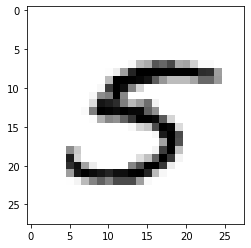

In [99]:
plt.imshow(some_digt_2, cmap=matplotlib.cm.binary, interpolation="nearest")

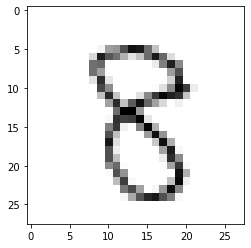

In [51]:
plt.imshow(some_digt, cmap=matplotlib.cm.binary, interpolation="nearest")

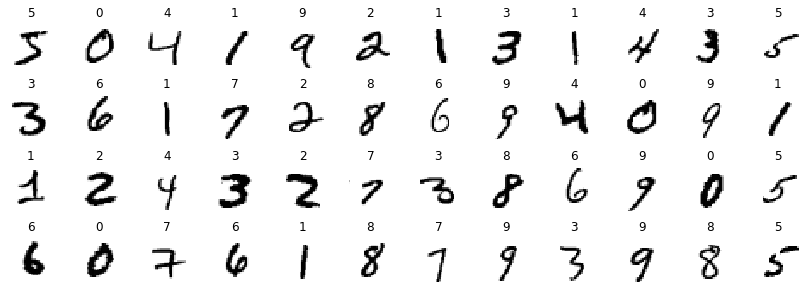

In [55]:
n_rows = 4
n_cols = 12
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap=matplotlib.cm.binary, interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [56]:
import numpy as np 

In [57]:
shuffle_index = np.random.permutation(X_train.shape[0])

In [64]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # przetasowanie indeksów

In [72]:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))

## Klasyfiktaor binarny

In [74]:
# klasyfikacja jedynie piatek
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [75]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [76]:
from sklearn.linear_model import SGDClassifier

In [78]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) # klasyfikator stochastycznego spadku wzdluz gradinetu
sgd_clf.fit(d2_X_train, y_train_5)

SGDClassifier(random_state=42)

In [101]:
sgd_clf.predict([some_digt.reshape((nx*ny,))]) # przewiduje wyswietlona 8

array([False])

In [102]:
sgd_clf.predict([some_digt_2.reshape((nx*ny,))]) # przewiduje wyswietlona piatke

array([ True])

## Miary wydajności

In [103]:
from sklearn.model_selection import cross_val_score

In [105]:
cross_val_score(sgd_clf, d2_X_train, y_train_5, cv=3, scoring="accuracy")

array([0.966 , 0.9422, 0.9592])

In [107]:
# Własna implementacja cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [109]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(d2_X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = d2_X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = d2_X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95675
0.9688
0.94915


In [110]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [112]:
# XD bo tylko 10% danych to piatki
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, d2_X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9105 , 0.9088 , 0.90965])